<a href="https://colab.research.google.com/github/KavitaGudimani28/Telecom_Churn_EDA_Project/blob/main/Kavita_Gudimani_EDA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
sns.set()

In [3]:
# Importing CSV from the drive and converting csv to pandas df
df = pd.read_csv('/content/drive/MyDrive/Copy of Telecom Churn.csv')

In [4]:
# Displaying 1st five rows
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Displaying last five rows
df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
Data Overview of the Data Set

In [6]:
def initial_overview(dataset):
    
    '''
    This function allows to view initial overview of the data.
    Such as number of rows, features and feature labels, 
    is/are there any missing value/s in the data set?,
    unique values in the dataset


    '''
    print('Overview of the Dataset')

    #shape of the Dataset
    print('\n Shape:',df.shape)

    #Rows in the dataset
    print("Rows:", df.shape[0])

    #Column or Feature in the dataset
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())

    #missing value
    missing_value = df.isnull().sum().values.sum()

    if missing_value == 0:
      print('\n Missing Values: No Missing Values')
    else:
      print('\n Missing Values:', missing_value)

    #unique value

    print("\n Unique values:")
    print(df.nunique())

     #Data Type
    print("\n Datatype:")
    print(df.dtypes)

    #Describe
    print("\n Statistics:")
    print(df.describe().T)

In [7]:
initial_overview(df)

Overview of the Dataset

 Shape: (3333, 20)
Rows: 3333

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

 Missing Values: No Missing Values

 Unique values:
State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
T

In [ ]:
Encoding:Binary Encoding

In [8]:
#Encoding
df["Int_Churn"] = df["Churn"].astype(int)
df["Int_Voice_mail_plan"] = df["Voice mail plan"].map({'Yes': 1, 'No': 0})
df["Int_International_plan"] = df["International plan"].map({'Yes': 1, 'No': 0})

#State Encoding
#Creating key from pd.Series and stored in key variable
key= pd.Series(df['State'])
#converting it into set for unique values or 'Key' of the state
key = set(key)
#Converting it into list
key= list(key)
len(key)

#For encoding each state will have number from 1 to 51
value =[]
for i in range (1,52, 1):
  
  value.append(i)

#Converting valuse list into dictonary

State_Dict = {key[i]: value[i] for i in range(len(key))}

df["Int_State"] = df["State"].map(State_Dict)

In [9]:
df[df['Churn']==True].T

,10,15,21,33,41,48,54,57,69,76,...,3268,3272,3280,3287,3291,3301,3304,3320,3322,3323
State,IN,NY,CO,AZ,MD,ID,WY,CO,TX,DC,...,WA,MD,AR,KS,MI,CA,IL,GA,MD,IN
Account length,65,161,77,12,135,119,87,121,150,82,...,84,133,76,170,119,84,71,122,62,117
Area code,415,415,408,408,408,415,415,408,510,415,...,415,510,408,415,510,415,510,510,408,415
International plan,No,No,No,No,Yes,No,No,No,No,No,...,No,No,No,No,Yes,No,Yes,Yes,No,No
Voice mail plan,No,No,No,No,Yes,No,No,Yes,No,No,...,No,No,No,Yes,Yes,No,No,No,No,No
Number vmail messages,0,0,0,0,41,0,0,30,0,0,...,0,0,0,42,22,0,0,0,0,0
Total day minutes,129.1,332.9,62.4,249.6,173.1,159.1,151.0,198.4,178.9,300.3,...,289.1,295.0,107.3,199.5,172.1,280.0,186.1,140.0,321.1,118.4
Total day calls,137,67,89,118,85,114,83,129,101,109,...,100,141,140,119,119,113,114,101,105,126
Total day charge,21.95,56.59,10.61,42.43,29.43,27.05,25.67,33.73,30.41,51.05,...,49.15,50.15,18.24,33.92,29.26,47.6,31.64,23.8,54.59,20.13
Total eve minutes,228.5,317.8,169.9,252.4,203.9,231.3,219.7,75.3,169.1,181.0,...,233.8,223.6,238.2,135.0,223.6,202.2,198.6,196.4,265.5,249.3


In [ ]:
Correlation Matrix of the Telecom Churn Data

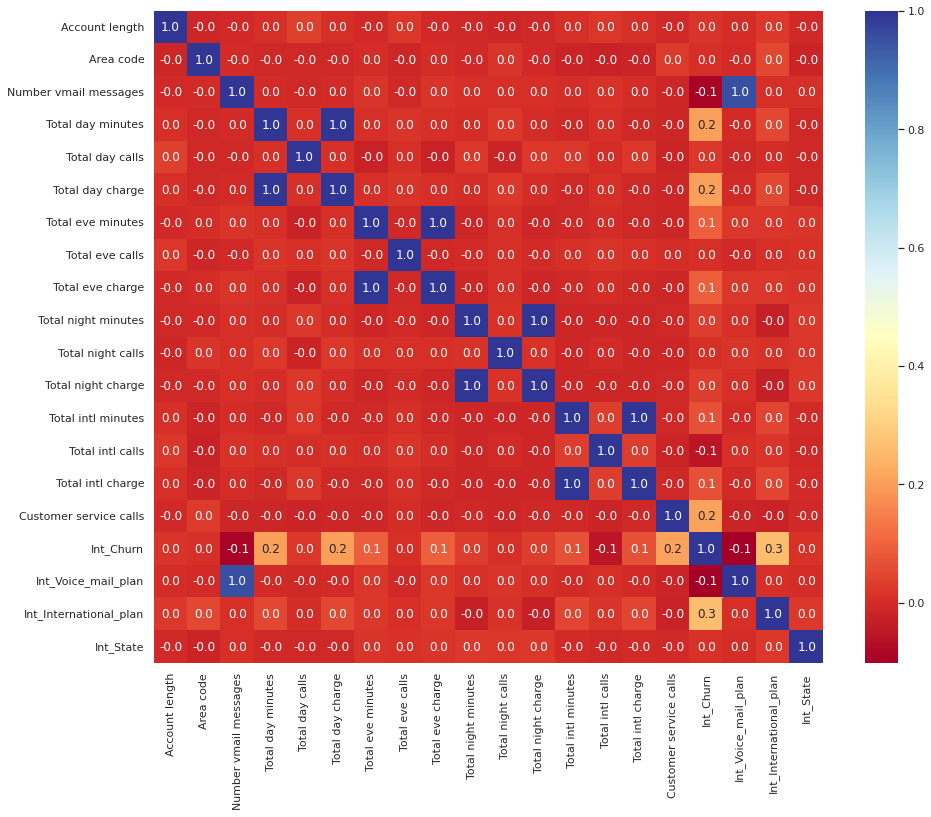

In [10]:
#plotting Telecom Churn Correlation Matrix
#creating copy of the orignal dataframe befor dropping the 'Churn' feature
df1 = df.copy()

df1 = df1.drop('Churn', axis = 1) 

plt.figure(figsize = (15, 12))
sns.heatmap(df1.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

In [ ]:
From the above Correlation Matrix:

International Plan (int) has postive correlation of 0.3 with Churn
Total Day Charges and Minutes and Customer Service calls have postive correlation of 0.2 with Churn
Total Evening Minute and Charges, Total Intl Minute and Charges have 0.1 Correlation with churn


In [ ]:
Dropping Features

From the above correlation matrix, features "Account lenght", 'Area code', 'Total day calls', 'Total eve calls', 'Total night calls' has no significant correlation with the Churn. Thus, dropping thsese features from the dataset

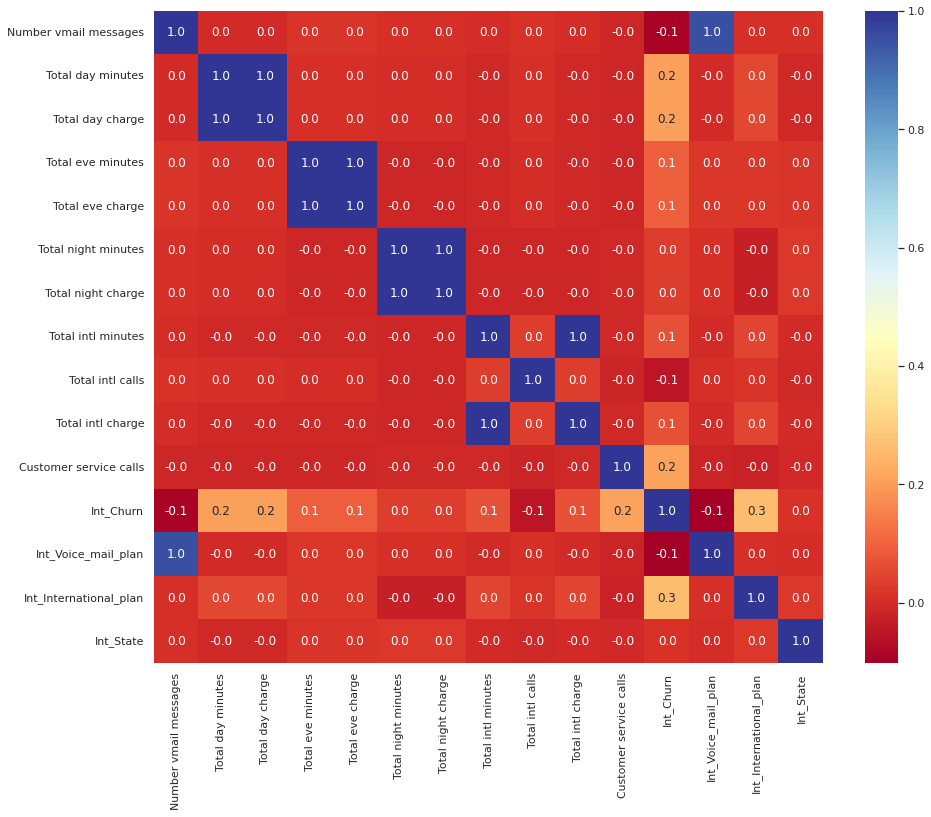

In [12]:
df1 = df1.drop(["Account length", 'Area code', 'Total day calls', 'Total eve calls', 'Total night calls'], axis = 1)

plt.figure(figsize = (15, 12))
sns.heatmap(df1.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

In [ ]:
Box Plot

Here, we dropping the columns/feature which has yes-no or 1-0 values to simplify the box plot.

Creating new df_numerical dataframe excluding these features : 'State', 'Int_State', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Int_Churn', 'Int_International_plan', 'Int_Voice_mail_plan

In [13]:
#only considering numerical data

df_numerical = df1.drop(['State', 'Int_State', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Int_Churn', 'Int_International_plan', 'Int_Voice_mail_plan'], axis = 1)
df_numerical.columns

Index(['Total day minutes', 'Total day charge', 'Total eve minutes',
       'Total eve charge', 'Total night minutes', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

In [ ]:
Plotting Box plot with Plotly

In [14]:
import plotly.graph_objs as go
import plotly
plot = []

def gen_boxplot(df_numerical):
    for feature in df_numerical:
        plot.append(go.Box(name = feature,y = df_numerical[feature]))
        
gen_boxplot(df_numerical)
plotly.offline.iplot(plot)